Ex23

In [398]:
import numpy as np
import matplotlib.pyplot as plt

In [399]:
def u(t):
    return (1 / ((1 + 24 * t**2) ** (1/2)))

In [400]:
def u_derivative(t):
    return (-24 * t) / ((1 + 24 * t ** 2) ** (3/2))

In [401]:
def evaluate_function(tdata):
    udata = np.zeros(len(tdata))
    for i, t in enumerate(tdata):
        udata[i] = u(t)
    return udata

In [402]:
def evaluate_derivative(tdata):
    udata = np.zeros(len(tdata))
    for i, t in enumerate(tdata):
        udata[i] = u_derivative(t)
    return udata

In [403]:
def evaluate_u_left(tdata):
    n = len(tdata)
    h = 1/(n)
    udata = np.zeros(len(tdata))
    udata[0] = u(tdata[0])
    for i in range(1,len(tdata)):
        udata[i] = (u(tdata[i]) - u(tdata[i-1]))/h
    return udata

In [404]:
def evaluate_u_center(tdata):
    n = len(tdata)

    h = 1/n
    udata = np.zeros(len(tdata))
    udata[0] = u(tdata[0])
    for i in range(1, n-1):
        udata[i] = (u(tdata[i+1]) - u(tdata[i-1]))/(2*h)
    udata[-1] = u(tdata[-1])
    return udata

In [405]:
def evaluate_u_right(tdata):
    n = len(tdata)
    h = 1/n
    udata = np.zeros(len(tdata))
    udata[0] = u(tdata[0])
    for i in range(0,n-1):
        udata[i+1] = (u(tdata[i+1]) - u(tdata[i]))/h
    return udata

In [406]:
n = 100
tdata = np.array([j/n for j in range(n+1)])

correct = evaluate_function(tdata)
derivative = evaluate_derivative(tdata)
leftsided = evaluate_u_left(tdata)
centered = evaluate_u_center(tdata)
rightsided = evaluate_u_right(tdata)


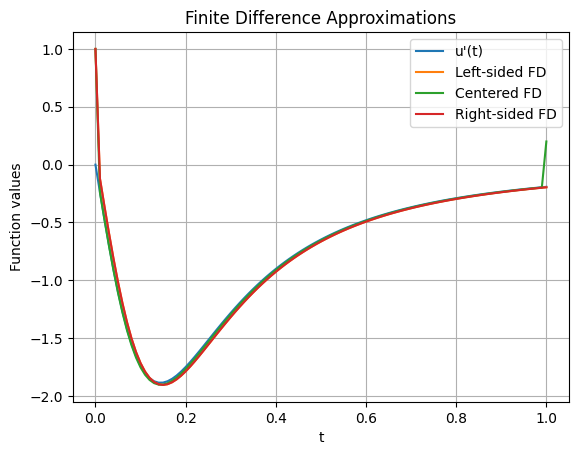

In [407]:
# plot results
plt.plot(tdata, derivative, label="u'(t)")
plt.plot(tdata, leftsided, label="Left-sided FD")
plt.plot(tdata, centered, label="Centered FD")
plt.plot(tdata, rightsided, label="Right-sided FD")
plt.xlabel('t')
plt.ylabel('Function values')
plt.title('Finite Difference Approximations')
plt.legend()
plt.grid()
plt.show()


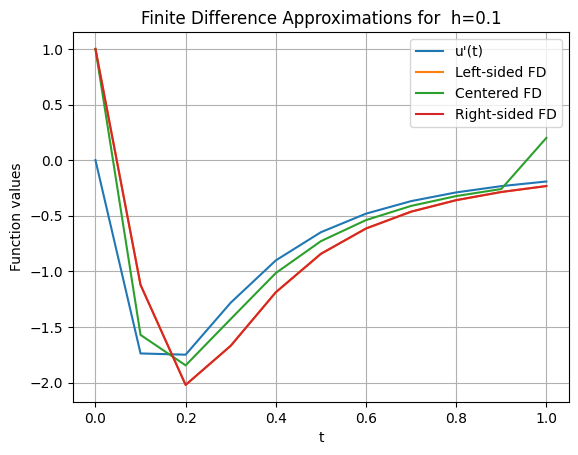

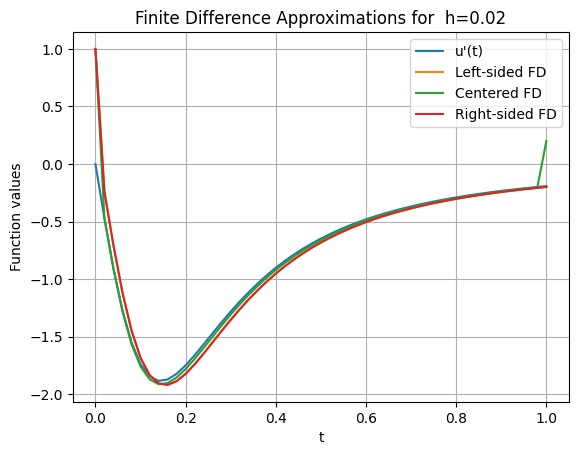

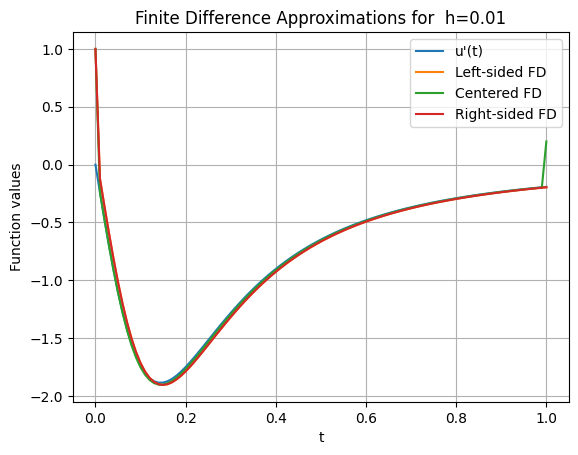

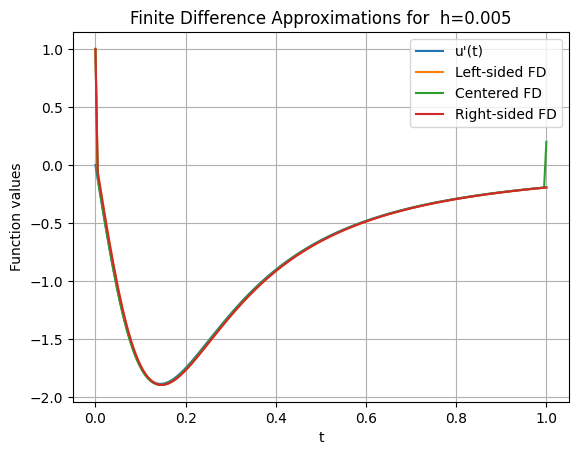

In [408]:
n_values = np.array([10, 50, 100, 200])

#plot u_left, u_center, u_right vs h not the error

for n in n_values:
    h = 1/n
    tdata = np.array([j/n for j in range(n+1)])
    derivative = evaluate_derivative(tdata)

    leftsided = evaluate_u_left(tdata)
    centered = evaluate_u_center(tdata)
    rightsided = evaluate_u_right(tdata)

    plt.plot(tdata, derivative, label="u'(t)")
    plt.plot(tdata, leftsided, label="Left-sided FD")
    plt.plot(tdata, centered, label="Centered FD")
    plt.plot(tdata, rightsided, label="Right-sided FD")
    plt.xlabel('t')
    plt.ylabel('Function values')
    plt.title(f'Finite Difference Approximations for  h={h}')
    plt.legend()
    plt.grid()
    plt.show()



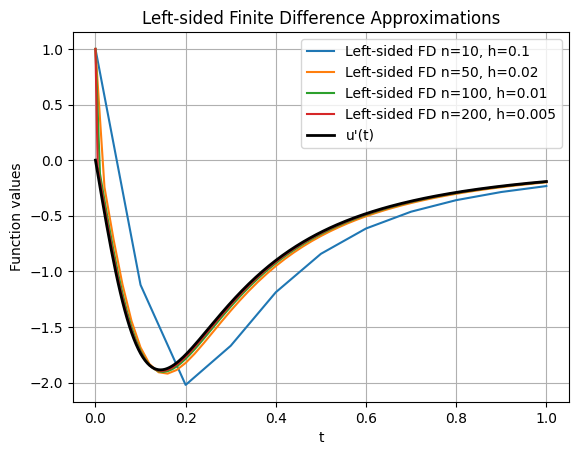

/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_49167/3743821837.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


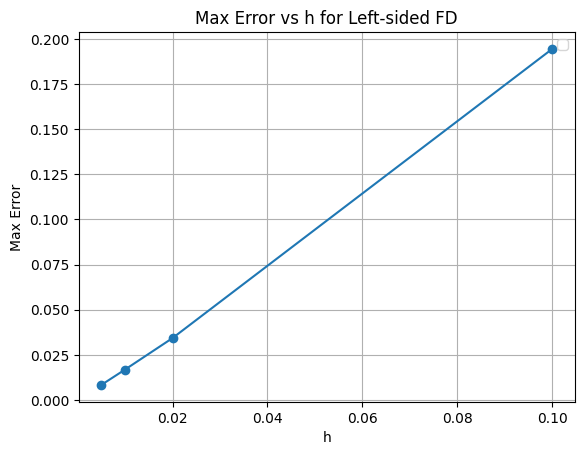

In [409]:
# now plot for u_left only in one plot
plt.figure()
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]
    derivative = evaluate_derivative(tdata)

    leftsided = evaluate_u_left(tdata)

    plt.plot(tdata, leftsided, label=f"Left-sided FD n={n}, h={h}")
plt.plot(tdata, derivative, label="u'(t)", color='black', linewidth=2)
plt.xlabel('t')
plt.ylabel('Function values')
plt.title('Left-sided Finite Difference Approximations')
plt.legend()
plt.grid()
plt.show()

# plot the errors vs h for fix t=0.5 
h_values = [1/n for n in n_values]
errors = np.zeros(len(n_values))
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]

    derivative = evaluate_derivative(tdata)
    leftsided = evaluate_u_left(tdata)

    errL = max(abs(leftsided[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)
    errors[np.where(n_values == n)[0][0]] = errL


plt.figure()
plt.plot(h_values, errors, marker='o')
plt.xlabel('h')
plt.ylabel('Max Error')
plt.title('Max Error vs h for Left-sided FD')
plt.grid()
plt.legend()
plt.show()


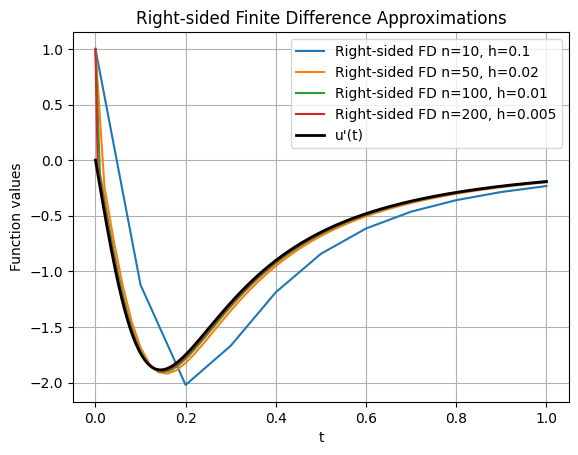

/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_49167/3656766740.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


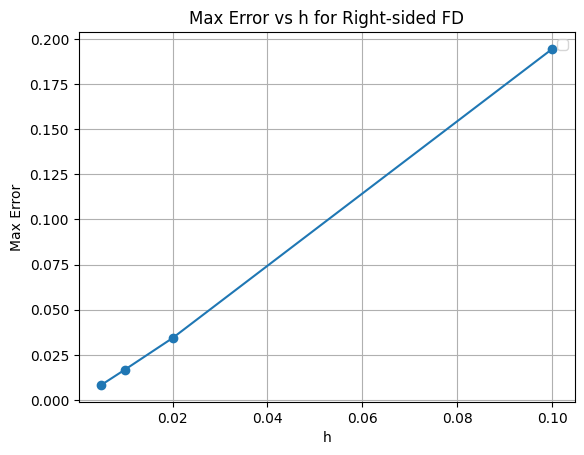

In [410]:
# now plot for u_right only in one plot
plt.figure()
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]
    derivative = evaluate_derivative(tdata)

    rightsided = evaluate_u_right(tdata)

    plt.plot(tdata, rightsided, label=f"Right-sided FD n={n}, h={h}")
plt.plot(tdata, derivative, label="u'(t)", color='black', linewidth=2)
plt.xlabel('t')
plt.ylabel('Function values')
plt.title('Right-sided Finite Difference Approximations')
plt.legend()
plt.grid()
plt.show()
# plot the errors vs h for fix t=0.5 
h_values = [1/n for n in n_values]
errors = np.zeros(len(n_values))
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]

    derivative = evaluate_derivative(tdata)
    rightsided = evaluate_u_right(tdata)

    errR = max(abs(rightsided[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)
    errors[np.where(n_values == n)[0][0]] = errR


plt.figure()
plt.plot(h_values, errors, marker='o')
plt.xlabel('h')
plt.ylabel('Max Error')
plt.title('Max Error vs h for Right-sided FD')
plt.grid()
plt.legend()
plt.show()


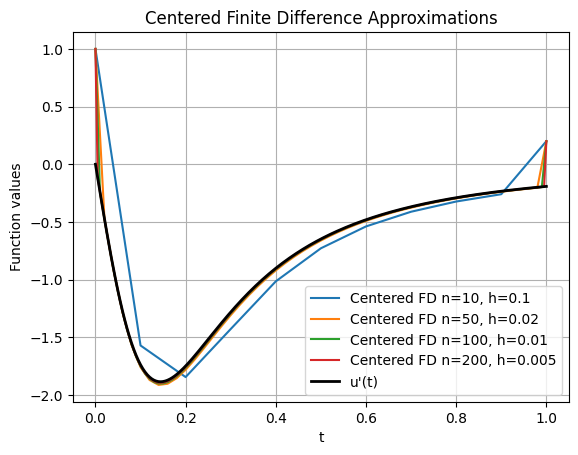

/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_49167/387233449.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


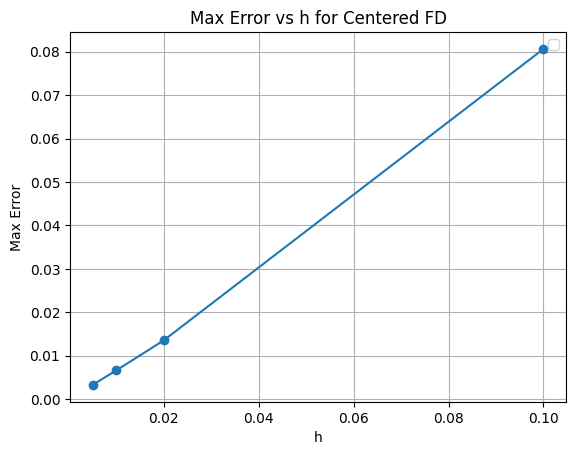

In [411]:
# now plot for u_center only in one plot
plt.figure()
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]
    derivative = evaluate_derivative(tdata)

    centered = evaluate_u_center(tdata)

    plt.plot(tdata, centered, label=f"Centered FD n={n}, h={h}")

plt.plot(tdata, derivative, label="u'(t)", color='black', linewidth=2)
plt.xlabel('t')
plt.ylabel('Function values')
plt.title('Centered Finite Difference Approximations')
plt.legend()
plt.grid()
plt.show()

# plot the errors vs h for fix t=0.5 
h_values = [1/n for n in n_values]
errors = np.zeros(len(n_values))
for n in n_values:
    h = 1/n
    tdata = [j/n for j in range(n+1)]

    derivative = evaluate_derivative(tdata)
    centered = evaluate_u_center(tdata)

    errC = max(abs(centered[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)
    errors[np.where(n_values == n)[0][0]] = errC


plt.figure()
plt.plot(h_values, errors, marker='o')
plt.xlabel('h')
plt.ylabel('Max Error')
plt.title('Max Error vs h for Centered FD')
plt.grid()
plt.legend()
plt.show()

n=10, h=0.1, errL=0.194, errC=0.081, errR=0.194
n=40, h=0.025, errL=0.043, errC=0.017, errR=0.043
n=70, h=0.014, errL=0.024, errC=0.01, errR=0.024
n=100, h=0.01, errL=0.017, errC=0.007, errR=0.017


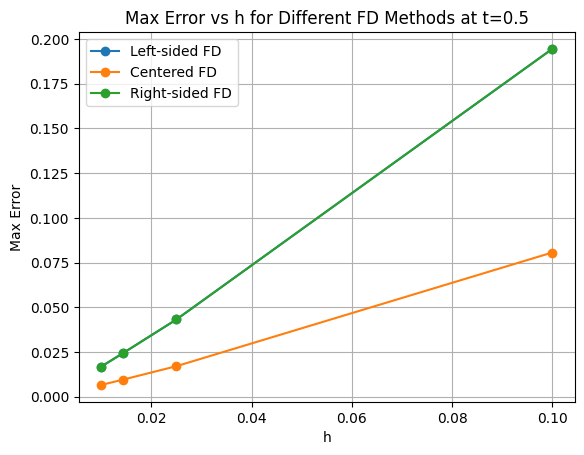

In [412]:
n_vals = np.linspace(10, 100, 4, dtype=int)

h_values = [1/n for n in n_vals]
errors_left = np.zeros(len(n_vals))
errors_center = np.zeros(len(n_vals))
errors_right = np.zeros(len(n_vals))

for k, n in enumerate(n_vals):
    h = 1/n
    tdata = [j/n for j in range(n+1)]

    derivative = evaluate_derivative(tdata)
    leftsided = evaluate_u_left(tdata)
    centered = evaluate_u_center(tdata)
    rightsided = evaluate_u_right(tdata)

    errL = max(abs(leftsided[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)
    errC = max(abs(centered[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)
    errR = max(abs(rightsided[i] - derivative[i]) for i in range(len(tdata)) if tdata[i] == 0.5)

    errors_left[k] = errL
    errors_center[k] = errC
    errors_right[k] = errR
    print(f"n={n}, h={round(h, 3)}, errL={round(errL, 3)}, errC={round(errC, 3)}, errR={round(errR, 3)}")

# plot
plt.figure()
plt.plot(h_values, errors_left,   marker='o', label='Left-sided FD')
plt.plot(h_values, errors_center, marker='o', label='Centered FD')
plt.plot(h_values, errors_right,  marker='o', label='Right-sided FD')
plt.xlabel('h')
plt.ylabel('Max Error')
plt.title('Max Error vs h for Different FD Methods at t=0.5')
plt.grid()
plt.legend()
plt.show()


Ex24

In [413]:
def euler(k, h, T=2.0, u0=10.0):
    n = int(T / h)
    t = np.linspace(0.0, T, n+1)
    u = np.zeros(n+1)
    u[0] = u0
    for j in range(n):
        u[j+1] = u[j] + h * k * u[j]   
    return t, u


-1.2000000000000002
-0.10000000000000009
0.44999999999999996


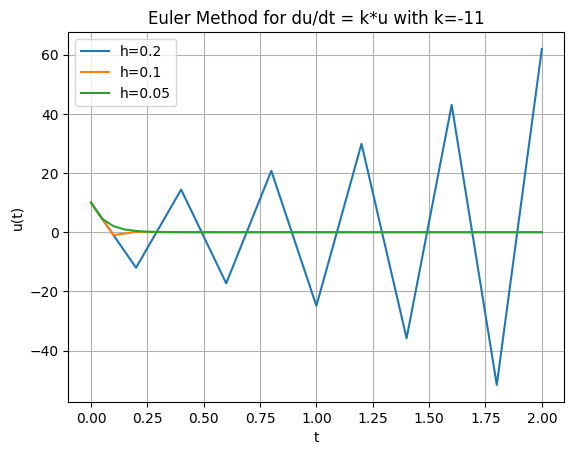

In [414]:
k = -11
step_sizes = [0.2, 0.1, 0.05]

for h in step_sizes:
    t, u = euler(k, h)
    print(1 + h * k)
    plt.plot(t, u, label=f'h={h}')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Euler Method for du/dt = k*u with k=-11')
plt.legend()
plt.grid()
plt.show()

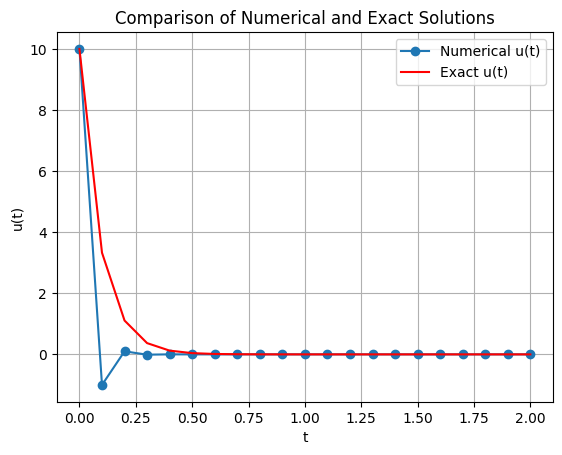

In [415]:
# plot u(t) and exact solution for k = -11 and h = 0.1
h = 0.1
t, u_num = euler(k, h)
u_exact = 10.0 * np.exp(k * t)
plt.plot(t, u_num, 'o-', label='Numerical u(t)')
plt.plot(t, u_exact, 'r-', label='Exact u(t)')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Comparison of Numerical and Exact Solutions')
plt.legend()
plt.grid()
plt.show()